(ref:lec1:useful_formulas)=
# Useful formulas
Before continuing with the exercises, we deem it useful to summarize some useful formula to interpret how the parameters of the transfer function affect the "characteristics" of the systems.

```{admonition} Note
:class: warning

This list is far from being comprehensive. For more details, please consult Chapter 3.3 of the book
- *Feedback control of dynamic systems*, Franklin, Powell, Emami-Naein, 2009 (6th edition).
```



## First order systems

Let's start by considering a first-order transfer function,

$$
G(s) = \frac{1}{s - p}
$$

where $p$ is the single, real pole. Of course, if $p > 0$ the system is unstable.
- **Stability**:
  - If $p < 0$ the system is (input-output) *stable*
  - If $p>=0$ the system is (input-output) *unstable*
- **Settling time**: If the pole is stable ($p < 0$) we can estimate the time required to be $\varepsilon \%$ close to the settling value ($y_{\infty} = \lim_{t \to \infty} y(t)$):
    - $T_{99\%} = \frac{5}{-p}$ (time to reach  $\pm 1 \%$ of $y_{\infty}$)
    - $T_{95\%} = \frac{3}{-p}$ (time to reach  $\pm 5 \%$ of $y_{\infty}$)
    - $T_{63\%} = \frac{1}{-p}$ (time to reach  $\pm 37$ of $y_{\infty}$)
    - $T_{1-\varepsilon}= \frac{\ln(\varepsilon)}{-p}$ (general formula)


### Second order systems with complex-conjugate poles
Suppose that $G(s)$ is a second order system with two complex-conjugate poles, 

$$
G(s) = \frac{1}{s^2 + b s + c}
$$

where $b^2 - 4a < 0$. These poles $p_1$ and $p_2$ have the following characteristics:
- **Real part**: $\Re(p_1) = \Re(p_2) = -\frac{b}{2}$
- **Imaginary part**: $\Im(p_{1, 2}) = \pm \frac{\sqrt{b^2 - 4c}}{2}$
- **Stability**: The stability of the system depends on the *real part* of the poles:
  - If $\Re(p_{1,2}) < 0 $ the system is (input-output) *stable*
  - If $\Re(p_{1,2}) > 0$ the system is (input-output) *unstable*
- **Natural frequency**: $\omega_0 = \sqrt{c}$
- **Damping ratio**: $\xi = \frac{b}{2 \omega_0}$
    - If $\xi = 1$ the system has two real (coinciding) poles;
    - If $0.75 \leq \xi \leq 1$ the system is over-damped and will exhibit almost no oscillation;
    - If $0.5 \leq \xi \leq 0.75$ the system is damped and will exhibit moderate oscillation;
    - If $0 < \xi < 0.5$ the system is under-damped and will exhibit high oscillation;
    - If $\xi = 0$ the poles are purely imaginary, meaning that the output diverges when the system is sollicited with step inputs.
- **Settling time**: If the system is stable ($\Re(p) < 0$), the settling time is approximated in a similar way to first-order systems, *using the real part of the poles*
    - $T_{99\%} = \frac{5}{-\Re(p)}$ (time to reach  $\pm 1 \%$ of $y_{\infty}$)
    - $T_{95\%} = \frac{3}{-\Re(p)}$ (time to reach  $\pm 5 \%$ of $y_{\infty}$)
    - $T_{63\%} = \frac{1}{-\Re(p)}$ (time to reach  $\pm 37 \%$ of $y_{\infty}$)
    - $T_{1-\varepsilon}= \frac{\ln(\varepsilon)}{-\Re(p)}$ (general formula)

```{admonition} Example
:class: example
See Example 3.3 of (Glad & Ljung, 2006).
```

#### Numerical example

Let's plot the step response of a bunch of second-order systems having poles with the same real part ($-1$) but different values of $\xi$. These systems will have equation

$$
G(s) = \frac{\omega_0^2}{s^2 + 2s + \omega_0^2}
$$

where $\omega_0 = \frac{-\Re(p)}{\xi} = \frac{1}{\xi}$ . 

In [1]:
set(groot, 'defaultLineLineWidth', 2);

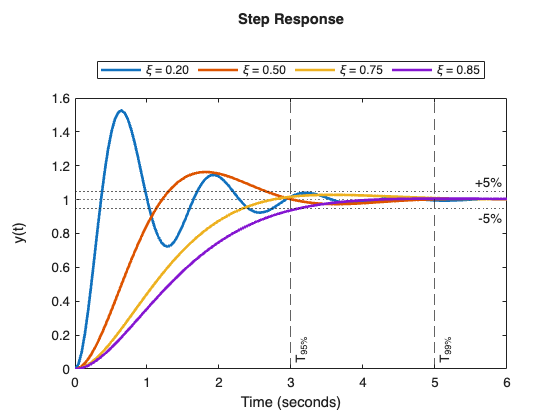

In [2]:
s = tf('s');
figure; hold on;
values_of_xi = [0.2, 0.5, 0.75, 0.85];
legend_entries = {};

for xi = values_of_xi
    % We fix the real part of the poles to -1. The real part is -omega_0 * xi. 
    % Therefore, omega_0 = 1/xi.
    omega_0 = 1 / (xi);
    G = omega_0^2/(s^2 + 2*xi*omega_0*s + omega_0^2);
    step(G);
    legend_entries{end+1} = sprintf('\\xi = %.2f', xi);
end
ylabel('y(t)'); xlim([0 6]);
legend(legend_entries, "Location", "northoutside", 'Orientation', 'horizontal');

T_95pc = 3 / 1;
T99pc = 5 / 1;
xline(T99pc, '--', 'T_{99%}', 'LabelVerticalAlignment', 'bottom', 'HandleVisibility', 'off');
xline(T_95pc, '--', 'T_{95%}', 'LabelVerticalAlignment', 'bottom', 'HandleVisibility', 'off');
yline(1.05, ':', '+5%', 'LabelVerticalAlignment', 'top', 'HandleVisibility', 'off');
yline(0.95, ':', '-5%', 'LabelVerticalAlignment', 'bottom', 'HandleVisibility', 'off');

## Higher order systems

If the transfer function has multiple real poles, or has a degree higher than $2$, its *dynamic response* is mostly determined by the **dominant poles**. 

```{admonition} Dominant Pole
:class: tip

If $G(s)$ is stable (all its poles have negative real part):

- The dominant pole is the one **closest to the origin**[^slowestpole]

If $G(s)$ is unstable (at least one pole has positive real part):

- The dominant pole is the one farthest into the right-half plane.[^mostunstablepole]
```

Note that the dominant pole is either real-valued (first order system) or complex-conjugates (second order system).

```{admonition} Warning
:class: warning

The dominant pole provides an approximation of the dynamic response of the higher-order system. 
An example of how to derive the dominant pole approximation is shown in the next page.

Note, however, that to estimate the settling time $T_{1-\varepsilon}$ of the high-order system it is often better to use the real pole, or the complex conjugate pole, with the smallest real part (especially when $\varepsilon$ is really small, like $\varepsilon < 0.01$).

```

[^slowestpole]: The pole closest to the origin (that is, with the smallest *modulus*) is the *slowest pole* of the system.

[^mostunstablepole]:  The pole farthest into the right-half plane (that is, with the largest *modulus* and positive real part) is the most unstable pole, that is, the one that is diverging faster.